# Various Mortgage Schedules

### 1. Imports

In [778]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### 2. Data synthesis

#### 2.1. Creating base dataframe

In [779]:
PAYMENT_COLS = [
  "apr",
  "15y_10d",
  "15y_12d",
  "15y_15d",
  "15y_18d",
  "15y_20d",
  "30y_10d",
  "30y_12d",
  "30y_15d",
  "30y_18d",
  "30y_20d",
]

MAX_APR = 0.075
APR_RESOLUTION = 0.0001
NUM_APRS = np.ceil(MAX_APR / APR_RESOLUTION).astype(int)

In [780]:
payments_df = pd.DataFrame(data=np.nan, index=np.arange(0, NUM_APRS+1, 1), columns=PAYMENT_COLS)

In [781]:
aprs = pd.Series(data=np.arange(0.0, MAX_APR+APR_RESOLUTION, APR_RESOLUTION))
payments_df["apr"] = aprs

#### 2.2. Adding different payment schedules

In [782]:
def get_no_interest_monthly_payment(term, down):
  N = term * 12.0
  g = 1.0 - down
  return g / N

In [783]:
def get_monthly_payment(apr, term, down):
  r = apr / 12.0
  N = term * 12.0
  g = 1.0 - down
  return (r * g) / (1.0 - np.power((1.0 + r), -N))

In [784]:
def get_apr_series(term, down):
  payments = aprs.copy()
  payments = get_monthly_payment(payments, term, down)
  return payments

In [785]:
payments_df["15y_10d"] = get_apr_series(15, 0.10)
payments_df["15y_12d"] = get_apr_series(15, 0.12)
payments_df["15y_15d"] = get_apr_series(15, 0.15)
payments_df["15y_18d"] = get_apr_series(15, 0.18)
payments_df["15y_20d"] = get_apr_series(15, 0.20)
payments_df["30y_10d"] = get_apr_series(30, 0.10)
payments_df["30y_12d"] = get_apr_series(30, 0.12)
payments_df["30y_15d"] = get_apr_series(30, 0.15)
payments_df["30y_18d"] = get_apr_series(30, 0.18)
payments_df["30y_20d"] = get_apr_series(30, 0.20)

In [786]:
payments_df.at[0, "15y_10d"] = get_no_interest_monthly_payment(15, 0.10)
payments_df.at[0, "15y_12d"] = get_no_interest_monthly_payment(15, 0.12)
payments_df.at[0, "15y_15d"] = get_no_interest_monthly_payment(15, 0.15)
payments_df.at[0, "15y_18d"] = get_no_interest_monthly_payment(15, 0.18)
payments_df.at[0, "15y_20d"] = get_no_interest_monthly_payment(15, 0.20)
payments_df.at[0, "30y_10d"] = get_no_interest_monthly_payment(30, 0.10)
payments_df.at[0, "30y_12d"] = get_no_interest_monthly_payment(30, 0.12)
payments_df.at[0, "30y_15d"] = get_no_interest_monthly_payment(30, 0.15)
payments_df.at[0, "30y_18d"] = get_no_interest_monthly_payment(30, 0.18)
payments_df.at[0, "30y_20d"] = get_no_interest_monthly_payment(30, 0.20)
payments_df

,apr,15y_10d,15y_12d,15y_15d,15y_18d,15y_20d,30y_10d,30y_12d,30y_15d,30y_18d,30y_20d
0,0.0000,0.005000,0.004889,0.004722,0.004556,0.004444,0.002500,0.002444,0.002361,0.002278,0.002222
1,0.0001,0.005004,0.004893,0.004726,0.004559,0.004448,0.002504,0.002448,0.002365,0.002281,0.002226
2,0.0002,0.005008,0.004896,0.004729,0.004562,0.004451,0.002508,0.002452,0.002368,0.002285,0.002229
3,0.0003,0.005011,0.004900,0.004733,0.004566,0.004455,0.002511,0.002455,0.002372,0.002288,0.002232
4,0.0004,0.005015,0.004904,0.004736,0.004569,0.004458,0.002515,0.002459,0.002375,0.002292,0.002236
...,...,...,...,...,...,...,...,...,...,...,...
746,0.0746,0.008323,0.008138,0.007860,0.007583,0.007398,0.006268,0.006129,0.005920,0.005711,0.005572
747,0.0747,0.008328,0.008143,0.007865,0.007588,0.007402,0.006274,0.006135,0.005926,0.005717,0.005577
748,0.0748,0.008333,0.008148,0.007870,0.007592,0.007407,0.006281,0.006141,0.005932,0.005722,0.005583
749,0.0749,0.008338,0.008153,0.007875,0.007597,0.007412,0.006287,0.006147,0.005938,0.005728,0.005588


#### 2.3. Save results as derived dataset

In [787]:
MORTGAGES_DATA_PATH = "../../data/derived/mortgages.csv"

In [788]:
payments_df.to_csv(MORTGAGES_DATA_PATH)

### 3. Analysis of results

In [789]:
MORTGAGE_COLS = PAYMENT_COLS[1:]

In [790]:
def get_customized_df(df, term, down):
  name = f"{str(term)}y_{str(int(100*down))}d"
  custom_df = df[["apr", name]].copy()

  N = term * 12.0
  g = 1.0 - down

  custom_df = custom_df.rename(columns={name: "payment"})
  custom_df["loan_term"] = term
  custom_df["total_payment"] = down + N * custom_df["payment"]
  custom_df["down_ratio"] = down / custom_df["total_payment"]
  custom_df["principal_ratio"] = g / custom_df["total_payment"]
  custom_df["interest_ratio"] = 1.0 - 1.0 / custom_df["total_payment"]
  custom_df["total_payment_ratio"] = custom_df["total_payment"] / 1.0
  custom_df["pti_ratio"] = \
    (custom_df["down_ratio"] + custom_df["principal_ratio"]) / custom_df["interest_ratio"]

  return custom_df

#### 3.1. Creating individual datasets for analysis

##### 3.1.1. 15-year loan, 10% down payment

In [791]:
y15_d10_df = get_customized_df(payments_df, 15, 0.10)

##### 3.1.2. 15-year loan, 12% down payment

In [792]:
y15_d12_df = get_customized_df(payments_df, 15, 0.12)

##### 3.1.3. 15-year loan, 15% down payment

In [793]:
y15_d15_df = get_customized_df(payments_df, 15, 0.15)

##### 3.1.4. 15-year loan, 18% down payment

In [794]:
y15_d18_df = get_customized_df(payments_df, 15, 0.18)

##### 3.1.5. 15-year loan, 20% down payment

In [795]:
y15_d20_df = get_customized_df(payments_df, 15, 0.20)

##### 3.1.6. 30-year loan, 10% down payment

In [796]:
y30_d10_df = get_customized_df(payments_df, 30, 0.10)

##### 3.1.7. 30-year loan, 12% down payment

In [797]:
y30_d12_df = get_customized_df(payments_df, 30, 0.12)

##### 3.1.8. 30-year loan, 15% down payment

In [798]:
y30_d15_df = get_customized_df(payments_df, 30, 0.15)

##### 3.1.9. 30-year loan, 18% down payment

In [799]:
y30_d18_df = get_customized_df(payments_df, 30, 0.18)

##### 3.1.10. 30-year loan, 20% down payment

In [800]:
y30_d20_df = get_customized_df(payments_df, 30, 0.20)

#### 3.2. How does monthly payment scale with APR?

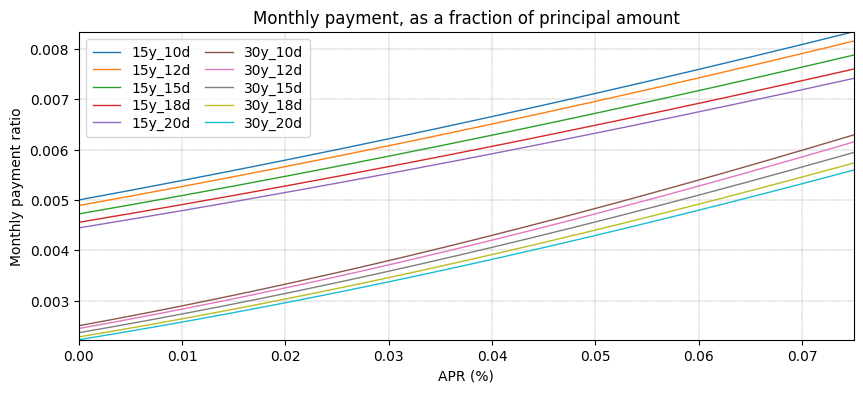

In [801]:
payments_df.plot(x="apr", y=MORTGAGE_COLS, lw=1, figsize=(10,4))
plt.title("Monthly payment, as a fraction of principal amount")
plt.xlabel("APR (%)")
plt.ylabel("Monthly payment ratio")
plt.legend(loc='upper left', ncol=2, borderpad=0.5, labelspacing=0.25, columnspacing=1.0)
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.show()

#### 3.3. How do down payment ratios scale with APR?

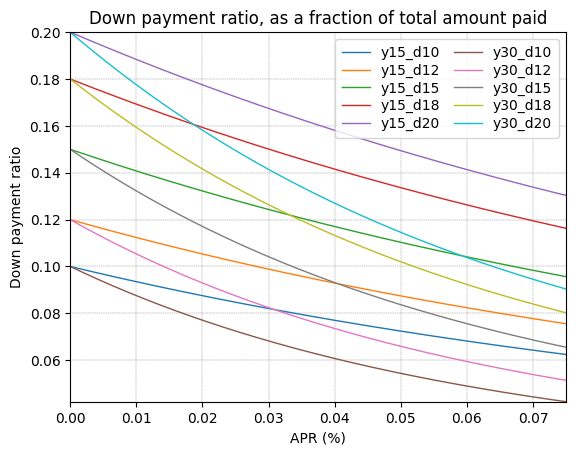

<Figure size 1000x400 with 0 Axes>

In [802]:
plt.plot(y15_d10_df["apr"], y15_d10_df["down_ratio"], lw=1, label="y15_d10")
plt.plot(y15_d12_df["apr"], y15_d12_df["down_ratio"], lw=1, label="y15_d12")
plt.plot(y15_d15_df["apr"], y15_d15_df["down_ratio"], lw=1, label="y15_d15")
plt.plot(y15_d18_df["apr"], y15_d18_df["down_ratio"], lw=1, label="y15_d18")
plt.plot(y15_d20_df["apr"], y15_d20_df["down_ratio"], lw=1, label="y15_d20")
plt.plot(y30_d10_df["apr"], y30_d10_df["down_ratio"], lw=1, label="y30_d10")
plt.plot(y30_d12_df["apr"], y30_d12_df["down_ratio"], lw=1, label="y30_d12")
plt.plot(y30_d15_df["apr"], y30_d15_df["down_ratio"], lw=1, label="y30_d15")
plt.plot(y30_d18_df["apr"], y30_d18_df["down_ratio"], lw=1, label="y30_d18")
plt.plot(y30_d20_df["apr"], y30_d20_df["down_ratio"], lw=1, label="y30_d20")
plt.title("Down payment ratio, as a fraction of total amount paid")
plt.xlabel("APR (%)")
plt.ylabel("Down payment ratio")
plt.legend(loc='upper right', ncol=2, borderpad=0.5, labelspacing=0.25, columnspacing=1.0)
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.figure(figsize=(10,4))
plt.show()

#### 3.4. How do non-down principal ratios scale with APR?

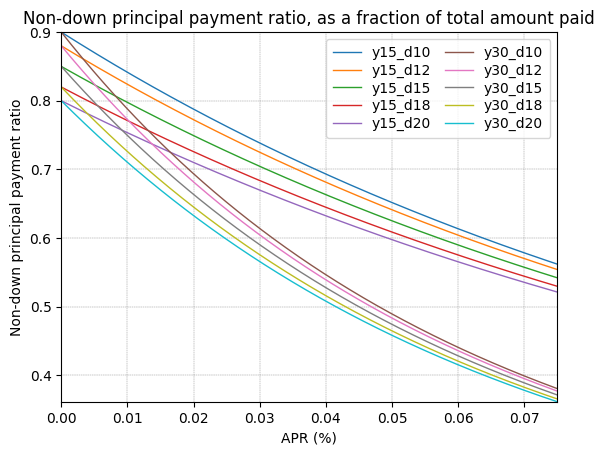

<Figure size 1000x400 with 0 Axes>

In [803]:
plt.plot(y15_d10_df["apr"], y15_d10_df["principal_ratio"], lw=1, label="y15_d10")
plt.plot(y15_d12_df["apr"], y15_d12_df["principal_ratio"], lw=1, label="y15_d12")
plt.plot(y15_d15_df["apr"], y15_d15_df["principal_ratio"], lw=1, label="y15_d15")
plt.plot(y15_d18_df["apr"], y15_d18_df["principal_ratio"], lw=1, label="y15_d18")
plt.plot(y15_d20_df["apr"], y15_d20_df["principal_ratio"], lw=1, label="y15_d20")
plt.plot(y30_d10_df["apr"], y30_d10_df["principal_ratio"], lw=1, label="y30_d10")
plt.plot(y30_d12_df["apr"], y30_d12_df["principal_ratio"], lw=1, label="y30_d12")
plt.plot(y30_d15_df["apr"], y30_d15_df["principal_ratio"], lw=1, label="y30_d15")
plt.plot(y30_d18_df["apr"], y30_d18_df["principal_ratio"], lw=1, label="y30_d18")
plt.plot(y30_d20_df["apr"], y30_d20_df["principal_ratio"], lw=1, label="y30_d20")
plt.title("Non-down principal payment ratio, as a fraction of total amount paid")
plt.xlabel("APR (%)")
plt.ylabel("Non-down principal payment ratio")
plt.legend(loc='upper right', ncol=2, borderpad=0.5, labelspacing=0.25, columnspacing=1.0)
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.figure(figsize=(10,4))
plt.show()

#### 3.5. How do interest ratios scale with APR?

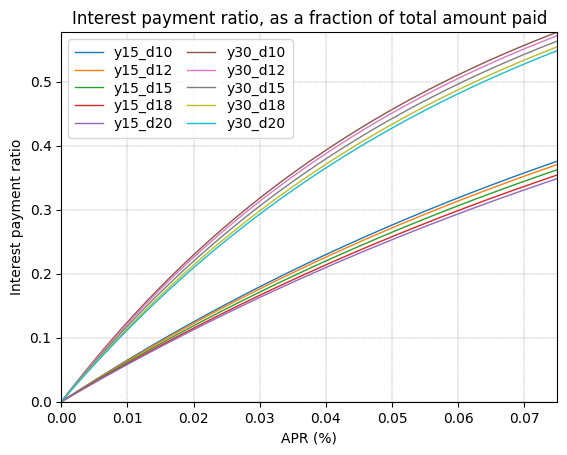

<Figure size 1000x400 with 0 Axes>

In [804]:
plt.plot(y15_d10_df["apr"], y15_d10_df["interest_ratio"], lw=1, label="y15_d10")
plt.plot(y15_d12_df["apr"], y15_d12_df["interest_ratio"], lw=1, label="y15_d12")
plt.plot(y15_d15_df["apr"], y15_d15_df["interest_ratio"], lw=1, label="y15_d15")
plt.plot(y15_d18_df["apr"], y15_d18_df["interest_ratio"], lw=1, label="y15_d18")
plt.plot(y15_d20_df["apr"], y15_d20_df["interest_ratio"], lw=1, label="y15_d20")
plt.plot(y30_d10_df["apr"], y30_d10_df["interest_ratio"], lw=1, label="y30_d10")
plt.plot(y30_d12_df["apr"], y30_d12_df["interest_ratio"], lw=1, label="y30_d12")
plt.plot(y30_d15_df["apr"], y30_d15_df["interest_ratio"], lw=1, label="y30_d15")
plt.plot(y30_d18_df["apr"], y30_d18_df["interest_ratio"], lw=1, label="y30_d18")
plt.plot(y30_d20_df["apr"], y30_d20_df["interest_ratio"], lw=1, label="y30_d20")
plt.title("Interest payment ratio, as a fraction of total amount paid")
plt.xlabel("APR (%)")
plt.ylabel("Interest payment ratio")
plt.legend(loc='upper left', ncol=2, borderpad=0.5, labelspacing=0.25, columnspacing=1.0)
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.figure(figsize=(10,4))
plt.show()

#### 3.6. How does the total payment ratio scale with APR?

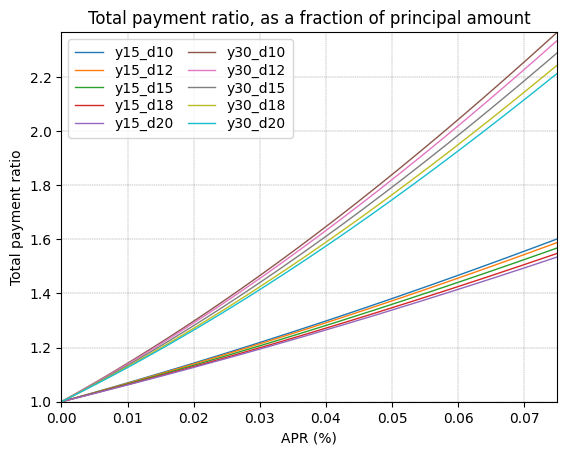

<Figure size 1000x400 with 0 Axes>

In [805]:
plt.plot(y15_d10_df["apr"], y15_d10_df["total_payment_ratio"], lw=1, label="y15_d10")
plt.plot(y15_d12_df["apr"], y15_d12_df["total_payment_ratio"], lw=1, label="y15_d12")
plt.plot(y15_d15_df["apr"], y15_d15_df["total_payment_ratio"], lw=1, label="y15_d15")
plt.plot(y15_d18_df["apr"], y15_d18_df["total_payment_ratio"], lw=1, label="y15_d18")
plt.plot(y15_d20_df["apr"], y15_d20_df["total_payment_ratio"], lw=1, label="y15_d20")
plt.plot(y30_d10_df["apr"], y30_d10_df["total_payment_ratio"], lw=1, label="y30_d10")
plt.plot(y30_d12_df["apr"], y30_d12_df["total_payment_ratio"], lw=1, label="y30_d12")
plt.plot(y30_d15_df["apr"], y30_d15_df["total_payment_ratio"], lw=1, label="y30_d15")
plt.plot(y30_d18_df["apr"], y30_d18_df["total_payment_ratio"], lw=1, label="y30_d18")
plt.plot(y30_d20_df["apr"], y30_d20_df["total_payment_ratio"], lw=1, label="y30_d20")
plt.title("Total payment ratio, as a fraction of principal amount")
plt.xlabel("APR (%)")
plt.ylabel("Total payment ratio")
plt.legend(loc='upper left', ncol=2, borderpad=0.5, labelspacing=0.25, columnspacing=1.0)
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.figure(figsize=(10,4))
plt.show()

#### 3.7. How does the principal-to-interest ratio scale with APR?

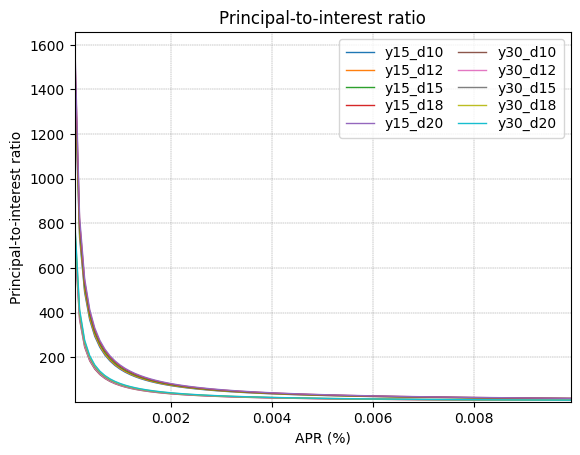

<Figure size 1000x400 with 0 Axes>

In [806]:
plt.plot(y15_d10_df.iloc[0:100]["apr"], y15_d10_df.iloc[0:100]["pti_ratio"], lw=1, label="y15_d10")
plt.plot(y15_d12_df.iloc[0:100]["apr"], y15_d12_df.iloc[0:100]["pti_ratio"], lw=1, label="y15_d12")
plt.plot(y15_d15_df.iloc[0:100]["apr"], y15_d15_df.iloc[0:100]["pti_ratio"], lw=1, label="y15_d15")
plt.plot(y15_d18_df.iloc[0:100]["apr"], y15_d18_df.iloc[0:100]["pti_ratio"], lw=1, label="y15_d18")
plt.plot(y15_d20_df.iloc[0:100]["apr"], y15_d20_df.iloc[0:100]["pti_ratio"], lw=1, label="y15_d20")
plt.plot(y30_d10_df.iloc[0:100]["apr"], y30_d10_df.iloc[0:100]["pti_ratio"], lw=1, label="y30_d10")
plt.plot(y30_d12_df.iloc[0:100]["apr"], y30_d12_df.iloc[0:100]["pti_ratio"], lw=1, label="y30_d12")
plt.plot(y30_d15_df.iloc[0:100]["apr"], y30_d15_df.iloc[0:100]["pti_ratio"], lw=1, label="y30_d15")
plt.plot(y30_d18_df.iloc[0:100]["apr"], y30_d18_df.iloc[0:100]["pti_ratio"], lw=1, label="y30_d18")
plt.plot(y30_d20_df.iloc[0:100]["apr"], y30_d20_df.iloc[0:100]["pti_ratio"], lw=1, label="y30_d20")
plt.axhline(y=1.0, ls='-', lw=0.7, c='black')
plt.title("Principal-to-interest ratio")
plt.xlabel("APR (%)")
plt.ylabel("Principal-to-interest ratio")
plt.legend(loc='upper right', ncol=2, borderpad=0.5, labelspacing=0.25, columnspacing=1.0)
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.figure(figsize=(10,4))
plt.show()

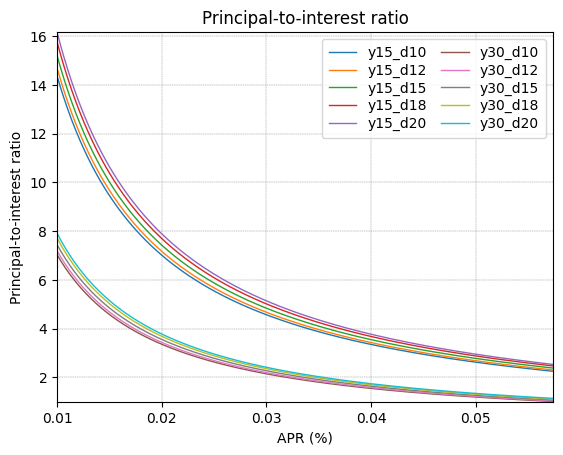

<Figure size 1000x400 with 0 Axes>

In [807]:
plt.plot(y15_d10_df.iloc[100:575]["apr"],y15_d10_df.iloc[100:575]["pti_ratio"],lw=1,label="y15_d10")
plt.plot(y15_d12_df.iloc[100:575]["apr"],y15_d12_df.iloc[100:575]["pti_ratio"],lw=1,label="y15_d12")
plt.plot(y15_d15_df.iloc[100:575]["apr"],y15_d15_df.iloc[100:575]["pti_ratio"],lw=1,label="y15_d15")
plt.plot(y15_d18_df.iloc[100:575]["apr"],y15_d18_df.iloc[100:575]["pti_ratio"],lw=1,label="y15_d18")
plt.plot(y15_d20_df.iloc[100:575]["apr"],y15_d20_df.iloc[100:575]["pti_ratio"],lw=1,label="y15_d20")
plt.plot(y30_d10_df.iloc[100:575]["apr"],y30_d10_df.iloc[100:575]["pti_ratio"],lw=1,label="y30_d10")
plt.plot(y30_d12_df.iloc[100:575]["apr"],y30_d12_df.iloc[100:575]["pti_ratio"],lw=1,label="y30_d12")
plt.plot(y30_d15_df.iloc[100:575]["apr"],y30_d15_df.iloc[100:575]["pti_ratio"],lw=1,label="y30_d15")
plt.plot(y30_d18_df.iloc[100:575]["apr"],y30_d18_df.iloc[100:575]["pti_ratio"],lw=1,label="y30_d18")
plt.plot(y30_d20_df.iloc[100:575]["apr"],y30_d20_df.iloc[100:575]["pti_ratio"],lw=1,label="y30_d20")
plt.axhline(y=1.0, ls='-', lw=0.7, c='black')
plt.title("Principal-to-interest ratio")
plt.xlabel("APR (%)")
plt.ylabel("Principal-to-interest ratio")
plt.legend(loc='upper right', ncol=2, borderpad=0.5, labelspacing=0.25, columnspacing=1.0)
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.figure(figsize=(10,4))
plt.show()

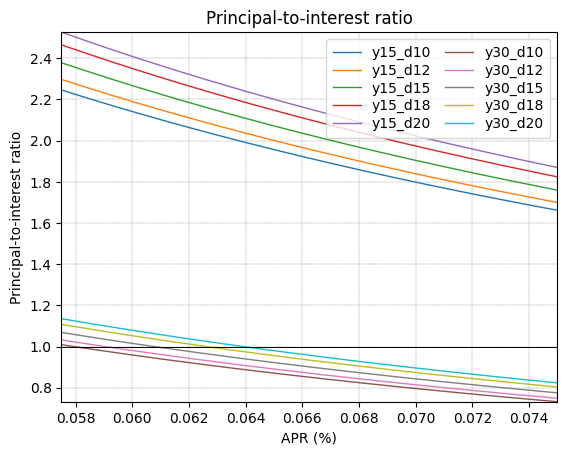

<Figure size 1000x400 with 0 Axes>

In [808]:
plt.plot(y15_d10_df.iloc[575:]["apr"], y15_d10_df.iloc[575:]["pti_ratio"], lw=1, label="y15_d10")
plt.plot(y15_d12_df.iloc[575:]["apr"], y15_d12_df.iloc[575:]["pti_ratio"], lw=1, label="y15_d12")
plt.plot(y15_d15_df.iloc[575:]["apr"], y15_d15_df.iloc[575:]["pti_ratio"], lw=1, label="y15_d15")
plt.plot(y15_d18_df.iloc[575:]["apr"], y15_d18_df.iloc[575:]["pti_ratio"], lw=1, label="y15_d18")
plt.plot(y15_d20_df.iloc[575:]["apr"], y15_d20_df.iloc[575:]["pti_ratio"], lw=1, label="y15_d20")
plt.plot(y30_d10_df.iloc[575:]["apr"], y30_d10_df.iloc[575:]["pti_ratio"], lw=1, label="y30_d10")
plt.plot(y30_d12_df.iloc[575:]["apr"], y30_d12_df.iloc[575:]["pti_ratio"], lw=1, label="y30_d12")
plt.plot(y30_d15_df.iloc[575:]["apr"], y30_d15_df.iloc[575:]["pti_ratio"], lw=1, label="y30_d15")
plt.plot(y30_d18_df.iloc[575:]["apr"], y30_d18_df.iloc[575:]["pti_ratio"], lw=1, label="y30_d18")
plt.plot(y30_d20_df.iloc[575:]["apr"], y30_d20_df.iloc[575:]["pti_ratio"], lw=1, label="y30_d20")
plt.axhline(y=1.0, ls='-', lw=0.7, c='black')
plt.title("Principal-to-interest ratio")
plt.xlabel("APR (%)")
plt.ylabel("Principal-to-interest ratio")
plt.legend(loc='upper right', ncol=2, borderpad=0.5, labelspacing=0.25, columnspacing=1.0)
plt.grid(ls='--', lw=0.3, c='gray')
plt.margins(0)
plt.figure(figsize=(10,4))
plt.show()